## To Measure Switching Kinetics of Organic Dyes ##  
### Objective : ###  
To plot a graph showing the average number of counts in each frame type (e.g channel frame, non-specific 1, non-specific 2, etc) while also indicating the maximum and minimum possible number of activations per frame. Will show whether the activations are reaching their maximum potential and also whether deactivation is complete before starting the next switching cycle.  


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Change directory
os.chdir("/home/gayatri/storm/brain_exp-1")

In [2]:
import glob
import storm_analysis.sa_utilities.hdf5_to_txt as hdf5ToTxt

# # Convert .hdf5 to csv

# bgs = sorted(glob.glob('background*.hdf5'))
# for movie in bgs :
#     bg_name = movie.rsplit('.hdf5',1)[0][:]
#     hdf5ToTxt.hdf5ToTxt(movie, bg_name+'.csv')

movies = sorted(glob.glob('movie*no_tr.hdf5'))
for movie in movies :
    movie_name = movie.rsplit('.hdf5',1)[0][:]
    hdf5ToTxt.hdf5ToTxt(movie, movie_name+'.csv')

Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.
Converting localizations.


In [6]:
mv = 'movie_0007_daostorm_no_tr.csv'
m = pd.read_csv(mv)
m['sum'].describe().apply(lambda x: format(x, 'f'))

count    1243851.000000
mean         448.410421
std          269.550399
min          126.431000
25%          271.235000
50%          368.295000
75%          534.186000
max        11459.616000
Name: sum, dtype: object

In [25]:
movie = 'movie_0004_daostorm.csv'
background_img = 'background_0004_647_daostorm.csv'
background_act = 'background_0004_561_daostorm.csv'

movie_name = movie.rsplit('.csv',1)[0][:]

df = pd.read_csv(movie)
bg_img = pd.read_csv(background_img)
bg_act = pd.read_csv(background_act)

In [26]:
# Create arrays of frame numbers as channel/non-specific.
movie_no = movie.rsplit('_daostorm.csv',1)[0][:].split('movie_00',1)[1][:]
cycle_list = {'01':11, '02':12, '03':13, '04':14, '05':15}
cycle_size = cycle_list[movie_no]
frame_list = {'01':1, '02':2, '03':3, '04':4, '05':5}
f = frame_list[movie_no]

last_frame = cycle_size*20

ch1 = numpy.arange(f,last_frame,cycle_size)
ns1 = numpy.arange(f+1,last_frame,cycle_size)
ns2 = numpy.arange(f+2,last_frame,cycle_size)
ns3 = numpy.arange(f+3,last_frame,cycle_size)
ns4 = numpy.arange(f+4,last_frame,cycle_size)
ns5 = numpy.arange(f+5,last_frame,cycle_size)
ns6 = numpy.arange(f+6,last_frame,cycle_size)
ns7 = numpy.arange(f+7,last_frame,cycle_size)
ns8 = numpy.arange(f+8,last_frame,cycle_size)
ns9 = numpy.arange(f+9,last_frame,cycle_size)

counts = df['frame'].value_counts().sort_index()

s1 = pd.Series(numpy.ravel(counts.reindex(ch1).values), index=None, name='ch1')
s2 = pd.Series(numpy.ravel(counts.reindex(ns1).values), index=None, name='ns1')
s3 = pd.Series(numpy.ravel(counts.reindex(ns2).values), index=None, name='ns2')
s4 = pd.Series(numpy.ravel(counts.reindex(ns3).values), index=None, name='ns3')
s5 = pd.Series(numpy.ravel(counts.reindex(ns4).values), index=None, name='ns4')
s6 = pd.Series(numpy.ravel(counts.reindex(ns5).values), index=None, name='ns5')
s7 = pd.Series(numpy.ravel(counts.reindex(ns6).values), index=None, name='ns6')
s8 = pd.Series(numpy.ravel(counts.reindex(ns7).values), index=None, name='ns7')
s9 = pd.Series(numpy.ravel(counts.reindex(ns8).values), index=None, name='ns8')
s10 = pd.Series(numpy.ravel(counts.reindex(ns9).values), index=None, name='ns9')

counts_per_frame = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9], axis=1)
counts_first_frame = pd.concat([s1], axis=1)
counts_last_frame = pd.concat([s9], axis=1)
[ch] = counts_first_frame.mean().to_numpy()
[ns] = counts_last_frame.mean().to_numpy()
maximum = bg_act['frame'].value_counts().sort_index().mean()
minimum = bg_img['frame'].value_counts().sort_index().mean()
print(ch, ns, maximum, minimum)

133.45 69.85 176.35 64.66


In [27]:
# print(bg_img['frame'].value_counts().sort_index().std())
print()

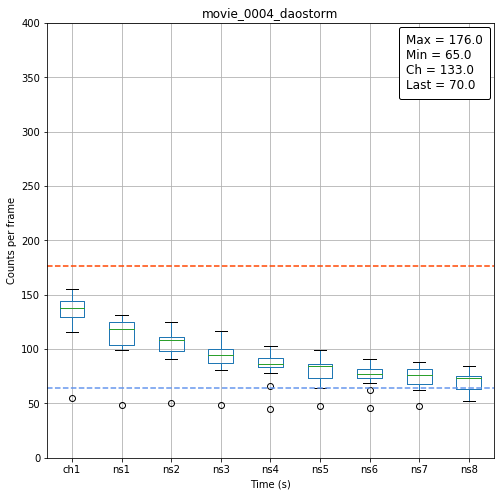

In [28]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize = (8,8))
p1 = counts_per_frame.boxplot()
p2 = plt.axhline(y=maximum, xmin=0, xmax=1,  linestyle='--',  color='orangered')
p3 = plt.axhline(y=minimum, xmin=0, xmax=1,  linestyle='--',  color='cornflowerblue')
# ax.legend(p2, p3, labels = ('Maximum', 'Minimum'))

at = AnchoredText("Max = " + str(numpy.around(maximum,0)) + '\n' + 'Min = ' + str(numpy.around(minimum,0)) + '\n' + 'Ch = ' + str(numpy.around(ch,0)) + '\n' + 'Last = ' + str(numpy.around(ns, 0)),
                        loc='upper right', prop=dict(size=12), frameon=True,
                        )
at.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")
ax.add_artist(at)

    
plt.ylim([0, 400])
plt.ylabel('Counts per frame')
plt.xlabel('Time (s)')
plt.title(movie_name)
# plt.savefig(movie_name + '_boxplot')
plt.show()

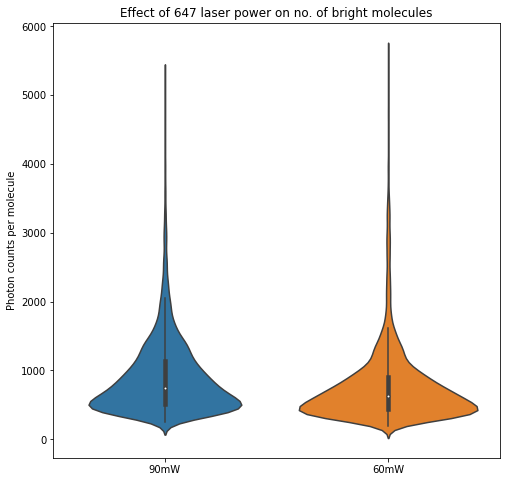

In [48]:
# Change directory
os.chdir("/home/gayatri/storm/flow-chamber-exp-1/")

import seaborn as sns

# bg_img['sum'].describe()

background_1 = 'test-5/background_0002_647_daostorm.csv'
background_2 = 'test-6/background_0002_647_daostorm.csv'

df_1 = pd.read_csv(background_1)
df_2 = pd.read_csv(background_2)

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.violinplot(data=[df_1['sum'],df_2['sum']])
ax.set_xticklabels(['90mW','60mW'])
# df_1['sum'].plot.box(vert=False)
# plt.xlim([0, 8000])
# plt.ylim([0, 500])
plt.ylabel('Photon counts per molecule')
# plt.xlabel('Laser power')
plt.title('Effect of 647 laser power on no. of bright molecules')
# plt.savefig('photon_sum')
plt.show()

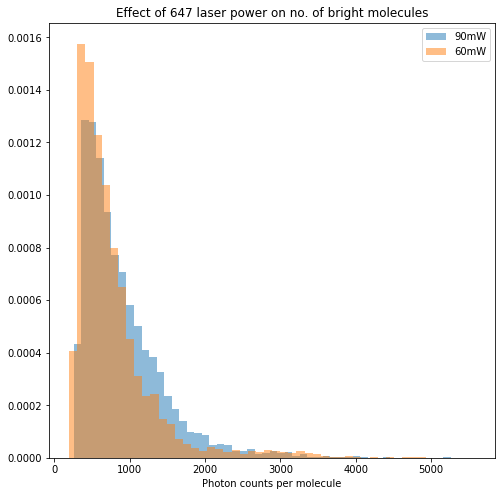

In [52]:
# Change directory
os.chdir("/home/gayatri/storm/flow-chamber-exp-1/")

background_1 = 'test-5/background_0002_647_daostorm.csv'
background_2 = 'test-6/background_0002_647_daostorm.csv'

df_1 = pd.read_csv(background_1)
df_2 = pd.read_csv(background_2)

fig, ax = plt.subplots(figsize = (8,8))
plt.hist(df_1['sum'], bins=50, alpha=0.5, label='90mW', density=True)
plt.hist(df_2['sum'], bins=50, alpha=0.5, label='60mW', density=True)
# plt.xlim([0, 8000])
# plt.ylim([0, 500])
plt.xlabel('Photon counts per molecule')
# plt.xlabel('Laser power')
plt.title('Effect of 647 laser power on no. of bright molecules')
plt.legend()
# plt.savefig('photon_sum')
plt.show()